In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Method 1: `grabcut`
ref: https://docs.opencv.org/trunk/d8/d83/tutorial_py_grabcut.html

## Demo

### Display your image

(600, 450, 3)


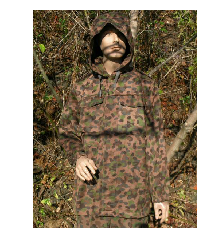

In [29]:
InteractiveShell.ast_node_interactivity = "none"
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

img = cv2.imread('../data/austrian-camo-shirt-b.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)
print(img.shape)

## Segmentation by `grabcut`

In [31]:
InteractiveShell.ast_node_interactivity = "none"

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

img = cv2.imread('../data/austrian-camo-shirt-b.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

# mark the region of interest, it is assumed object of interest is within the rect
rect = (10,10,450-20,600-20) #(start_x, start_y, width, height)

_ = cv2.grabCut(img,mask,rect,bgdModel,fgdModel,3,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img2_black = img*mask2[:,:,np.newaxis]

#Get the background
background = img - img2_black
#Change all pixels in the background that are not black to white 
background[np.where((background > [0,0,0]).all(axis = 2))] =[255,255,255] 
#Add the background and the image 
img2_white = background + img2_black

## Display the result

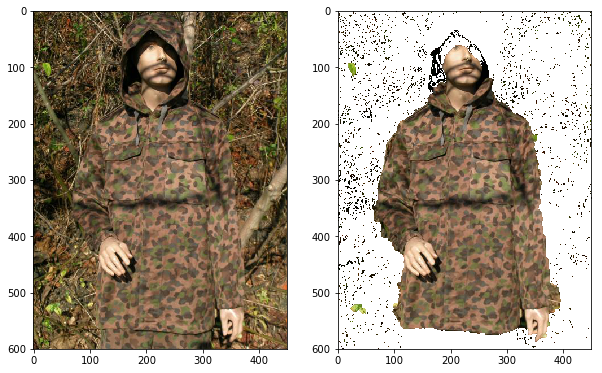

In [32]:
plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
plt.imshow(img)

plt.subplot(1,2,2)
plt.imshow(img2_white)